In [46]:
import pandas as pd
from datetime import datetime
import numpy as np
import itertools
import warnings
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
import statsmodels.api as sm

# Data Preparation, Analysis & Cleaning

In [15]:
aapl = pd.read_csv('close.csv')
aapl.head()

,Date,Close
0,1980-12-12,0.513393
1,1980-12-15,0.486607
2,1980-12-16,0.450893
3,1980-12-17,0.462054
4,1980-12-18,0.475446


In [16]:
aapl.describe()

,Close
count,9517.000000
mean,24.895934
std,44.352118
min,0.196429
25%,1.044643
50%,1.656250
75%,24.594286
max,228.360001


In [18]:
aapl['Date'] = pd.to_datetime(aapl.Date)
aapl.index = aapl.Date

In [19]:
aapl.index

DatetimeIndex(['1980-12-12', '1980-12-15', '1980-12-16', '1980-12-17',
               '1980-12-18', '1980-12-19', '1980-12-22', '1980-12-23',
               '1980-12-24', '1980-12-26',
               ...
               '2018-08-27', '2018-08-28', '2018-08-29', '2018-08-30',
               '2018-08-31', '2018-09-04', '2018-09-05', '2018-09-06',
               '2018-09-07', '2018-09-10'],
              dtype='datetime64[ns]', name='Date', length=9517, freq=None)

In [26]:
y = aapl.Close.resample('M').mean()

In [32]:
y.tail()

Date
2018-05-31    185.536818
2018-06-30    188.621429
2018-07-31    190.311429
2018-08-31    213.346089
2018-09-30    223.592001
Freq: M, Name: Close, dtype: float64

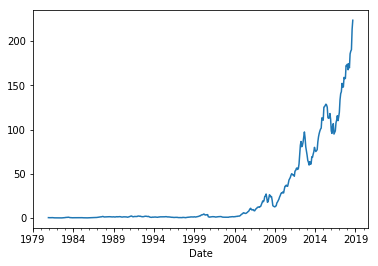

In [29]:
y.plot()

In [34]:
ts = y['2004-01-01': '2018-09-30']

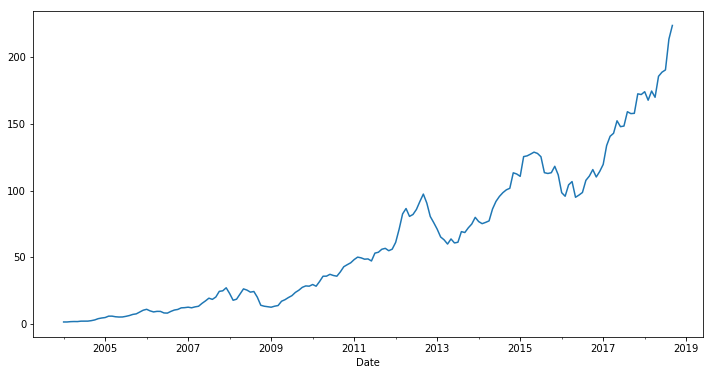

In [35]:
ts.plot(figsize=(12,6))

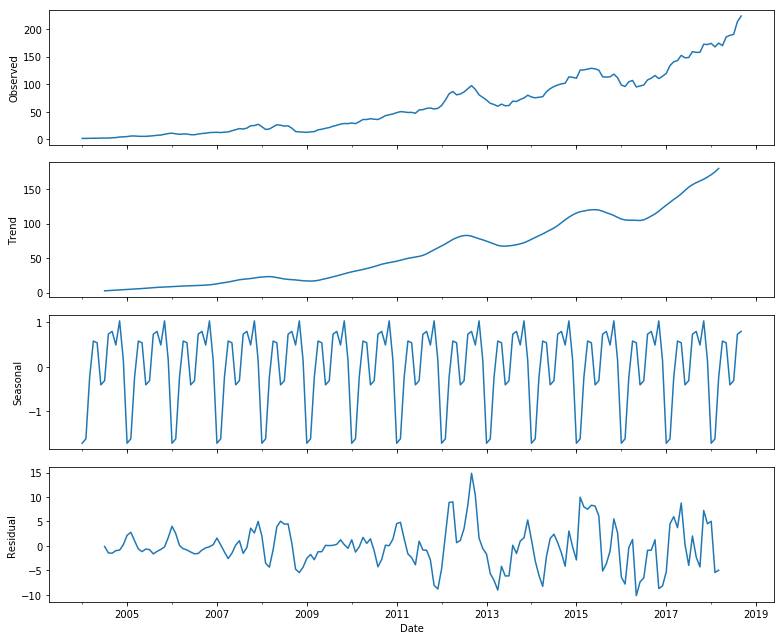

In [40]:
from pylab import rcParams
rcParams['figure.figsize'] = 11, 9
decomposition = sm.tsa.seasonal_decompose(ts, model='additive')
fig = decomposition.plot()
plt.show()

In [51]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 3)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 0, 2, 12)
SARIMAX: (0, 0, 2) x (0, 1, 0, 12)
SARIMAX: (0, 0, 2) x (0, 1, 1, 12)


In [52]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(ts,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:2055.934452856526
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1931.5095731584229
ARIMA(0, 0, 0)x(0, 0, 2, 12)12 - AIC:1664.4467906541986
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:1513.1411083238354
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:1415.4932324124882
ARIMA(0, 0, 0)x(0, 1, 2, 12)12 - AIC:1317.542861398609
ARIMA(0, 0, 0)x(0, 2, 0, 12)12 - AIC:1489.447890117171
ARIMA(0, 0, 0)x(0, 2, 1, 12)12 - AIC:1289.1722836699842
ARIMA(0, 0, 0)x(0, 2, 2, 12)12 - AIC:1138.7795262786144
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:1463.3861350324773
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1390.2816926371534
ARIMA(0, 0, 0)x(1, 0, 2, 12)12 - AIC:1294.8650281558425
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:1423.7586117518972
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:1386.0440581117884
ARIMA(0, 0, 0)x(1, 1, 2, 12)12 - AIC:1212.8061344293164
ARIMA(0, 0, 0)x(1, 2, 0, 12)12 - AIC:1333.7319343211723
ARIMA(0, 0, 0)x(1, 2, 1, 12)12 - AIC:1275.4889888683629
ARIMA(0, 0, 0)x(1, 2, 2, 12)12 - AIC:1140.779369193

In [53]:
mod = sm.tsa.statespace.SARIMAX(ts,
                                order=(0, 1, 2),
                                seasonal_order=(0, 2, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.1984      0.099      2.009      0.045       0.005       0.392
ma.L2          0.0417      0.103      0.404      0.686      -0.160       0.244
ma.S.L12      -1.8929   3835.036     -0.000      1.000   -7518.426    7514.640
ma.S.L24       1.0000   4052.068      0.000      1.000   -7940.908    7942.908
sigma2        28.0965   1.14e+05      0.000      1.000   -2.23e+05    2.23e+05


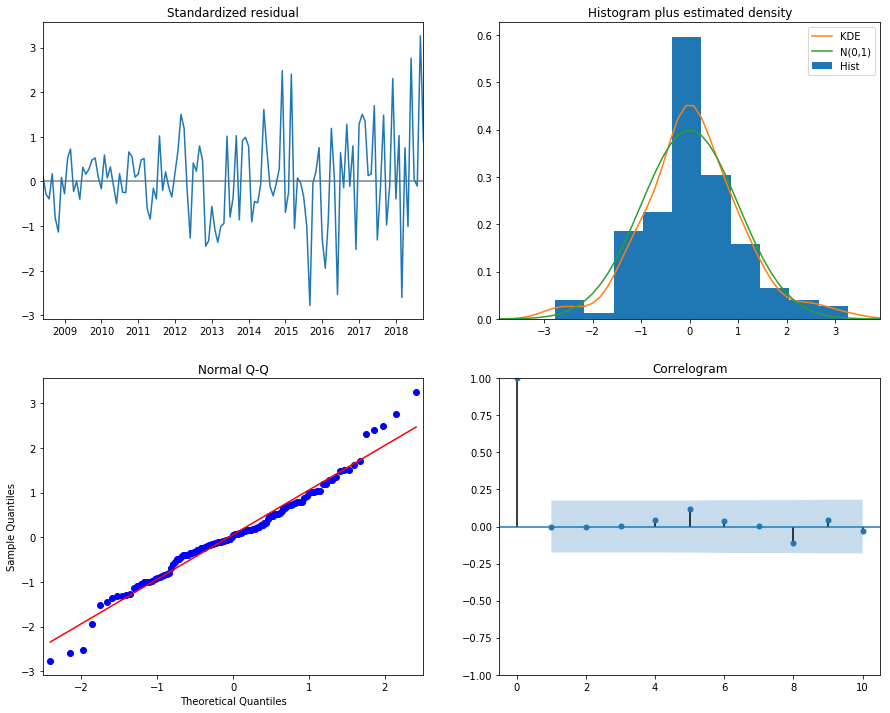

In [54]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

In [63]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(2, 4)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (2, 2, 3) x (2, 2, 3, 12)
SARIMAX: (2, 2, 3) x (2, 3, 2, 12)
SARIMAX: (2, 3, 2) x (2, 3, 3, 12)
SARIMAX: (2, 3, 2) x (3, 2, 2, 12)


In [64]:
seasonal_pdq

[(2, 2, 2, 12),
 (2, 2, 3, 12),
 (2, 3, 2, 12),
 (2, 3, 3, 12),
 (3, 2, 2, 12),
 (3, 2, 3, 12),
 (3, 3, 2, 12),
 (3, 3, 3, 12)]

In [65]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(ts,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(2, 2, 2)x(2, 2, 2, 12)12 - AIC:841.1981681760274
ARIMA(2, 2, 2)x(2, 2, 3, 12)12 - AIC:759.488017607985
ARIMA(2, 2, 2)x(2, 3, 2, 12)12 - AIC:828.9375873755464
ARIMA(2, 2, 2)x(2, 3, 3, 12)12 - AIC:nan
ARIMA(2, 2, 2)x(3, 2, 2, 12)12 - AIC:758.4165042176046
ARIMA(2, 2, 2)x(3, 2, 3, 12)12 - AIC:753.982846280382
ARIMA(2, 2, 2)x(3, 3, 2, 12)12 - AIC:746.5293997930822
ARIMA(2, 2, 2)x(3, 3, 3, 12)12 - AIC:nan
ARIMA(2, 2, 3)x(2, 2, 2, 12)12 - AIC:835.1506726647292
ARIMA(2, 2, 3)x(2, 2, 3, 12)12 - AIC:754.3094107972993
ARIMA(2, 2, 3)x(2, 3, 2, 12)12 - AIC:820.3525315097284
ARIMA(2, 2, 3)x(2, 3, 3, 12)12 - AIC:nan
ARIMA(2, 2, 3)x(3, 2, 2, 12)12 - AIC:759.776483983866
ARIMA(2, 2, 3)x(3, 2, 3, 12)12 - AIC:750.5351394160126
ARIMA(2, 2, 3)x(3, 3, 2, 12)12 - AIC:745.0040449952328
ARIMA(2, 2, 3)x(3, 3, 3, 12)12 - AIC:nan
ARIMA(2, 3, 2)x(2, 2, 2, 12)12 - AIC:843.1610200338257
ARIMA(2, 3, 2)x(2, 2, 3, 12)12 - AIC:758.497831938754
ARIMA(2, 3, 2)x(2, 3, 2, 12)12 - AIC:856.9611022964996
ARIMA(2, 3, 2)x

In [66]:
mod = sm.tsa.statespace.SARIMAX(ts,
                                order=(3, 2, 2),
                                seasonal_order=(3, 3, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0479      0.822     -0.058      0.954      -1.660       1.564
ar.L2          0.3251      0.309      1.052      0.293      -0.281       0.931
ar.L3         -0.0458      0.216     -0.212      0.832      -0.470       0.378
ma.L1         -0.5981      3.593     -0.166      0.868      -7.640       6.444
ma.L2         -0.4041      1.467     -0.275      0.783      -3.279       2.471
ar.S.L12      -0.8297      0.215     -3.856      0.000      -1.251      -0.408
ar.S.L24      -0.6178      0.167     -3.694      0.000      -0.946      -0.290
ar.S.L36      -0.8913      0.169     -5.261      0.000      -1.223      -0.559
ma.S.L12      -1.2391    137.646     -0.009      0.993    -271.021     268.543
ma.S.L24       0.2387     33.190      0.007      0.994     -64.813      65.290
sigma2        21.8807   3028.681      0.007      0.9

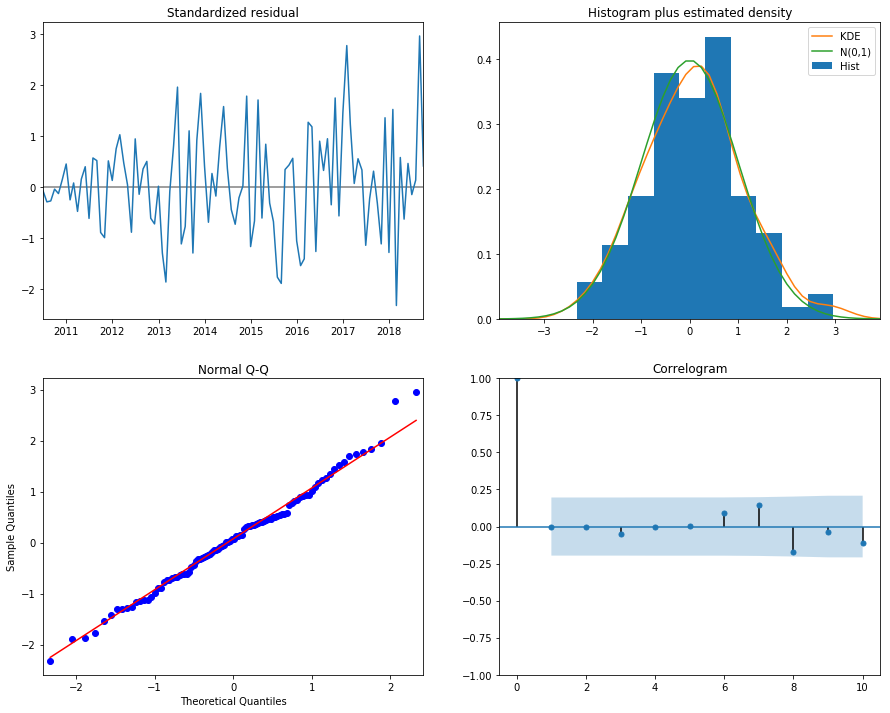

In [67]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

In [87]:
ts

Date
2004-01-31      1.628678
2004-02-29      1.628910
2004-03-31      1.871304
2004-04-30      1.966156
2004-05-31      1.934143
2004-06-30      2.237993
2004-07-31      2.234932
2004-08-31      2.267760
2004-09-30      2.620408
2004-10-31      3.168912
2004-11-30      4.104626
2004-12-31      4.607045
2005-01-31      4.944893
2005-02-28      5.980865
2005-03-31      5.999675
2005-04-30      5.532993
2005-05-31      5.331701
2005-06-30      5.370130
2005-07-31      5.844429
2005-08-31      6.437888
2005-09-30      7.287823
2005-10-31      7.705442
2005-11-30      9.079456
2005-12-31     10.429592
2006-01-31     11.115714
2006-02-28      9.931278
2006-03-31      9.147888
2006-04-30      9.571955
2006-05-31      9.540324
2006-06-30      8.387078
                 ...    
2016-04-30    106.739048
2016-05-31     94.974762
2016-06-30     96.622273
2016-07-31     98.556500
2016-08-31    107.665218
2016-09-30    110.857142
2016-10-31    115.707143
2016-11-30    110.154285
2016-12-31    114.33

In [114]:
pred = results.get_prediction(start =pd.to_datetime('2018-01-31'), dynamic=False)

In [115]:
pred_ci = pred.conf_int()
pred_ci

,lower Close,upper Close
Date,,
2018-01-31,150.928186,176.944626
2018-02-28,170.069302,196.073915
2018-03-31,157.680312,183.683317
2018-04-30,161.031095,187.033078
2018-05-31,169.518066,195.481763
2018-06-30,176.652796,202.605799
2018-07-31,176.468361,202.406095
2018-08-31,180.821925,206.748104
2018-09-30,207.930461,233.844817


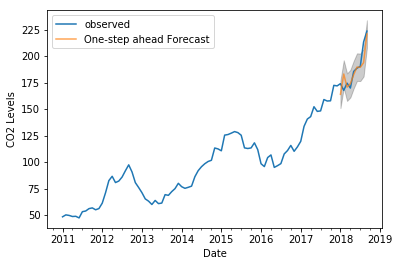

In [116]:
ax = y['2011':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('CO2 Levels')
plt.legend()

plt.show()

In [117]:
y_forecasted = pred.predicted_mean
y_truth = y['2017-01-31':]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 85.85
